In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
#importing our cancer dataset
dataset = pd.read_csv("c:/users/fadic/anaconda3/Library/lib/Untitled Folder/breast-cancer-wisconsin-data.csv")


In [2]:
dataset.head()

,ID,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epi_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
# Convert the dictionary into DataFrame
dataset_pd = pd.DataFrame(dataset)
# Before renaming the columns
print(dataset_pd)
 
dataset_pd.rename(columns = {'class':'diag'}, inplace = True)
 
# After renaming the columns
print("\nAfter modifying first column:\n", dataset_pd.columns)

          ID  clump_thickness  uniformity_cell_size  uniformity_cell_shape  \
0    1000025                5                     1                      1   
1    1002945                5                     4                      4   
2    1015425                3                     1                      1   
3    1016277                6                     8                      8   
4    1017023                4                     1                      1   
..       ...              ...                   ...                    ...   
694   776715                3                     1                      1   
695   841769                2                     1                      1   
696   888820                5                    10                     10   
697   897471                4                     8                      6   
698   897471                4                     8                      8   

     marginal_adhesion  single_epi_cell_size bare_nuclei  bland

In [4]:
print("Cancer data set dimensions : {}".format(dataset.shape))

Cancer data set dimensions : (699, 11)


In [5]:
#need to convert the 2 and 4 to 0  and 1 for the code to work.
dataset['diag'].replace([2, 4], 
                         [0, 1], inplace=True)

In [6]:
#Check data with info function
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     699 non-null    int64 
 1   clump_thickness        699 non-null    int64 
 2   uniformity_cell_size   699 non-null    int64 
 3   uniformity_cell_shape  699 non-null    int64 
 4   marginal_adhesion      699 non-null    int64 
 5   single_epi_cell_size   699 non-null    int64 
 6   bare_nuclei            699 non-null    object
 7   bland_chromatin        699 non-null    int64 
 8   normal_nucleoli        699 non-null    int64 
 9   mitoses                699 non-null    int64 
 10  diag                   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
#this is based on the table from the logistic regression code displayed.
data=dataset.drop(columns=['ID' , 'clump_thickness' , 'mitoses' , 'bare_nuclei' , 'single_epi_cell_size'])

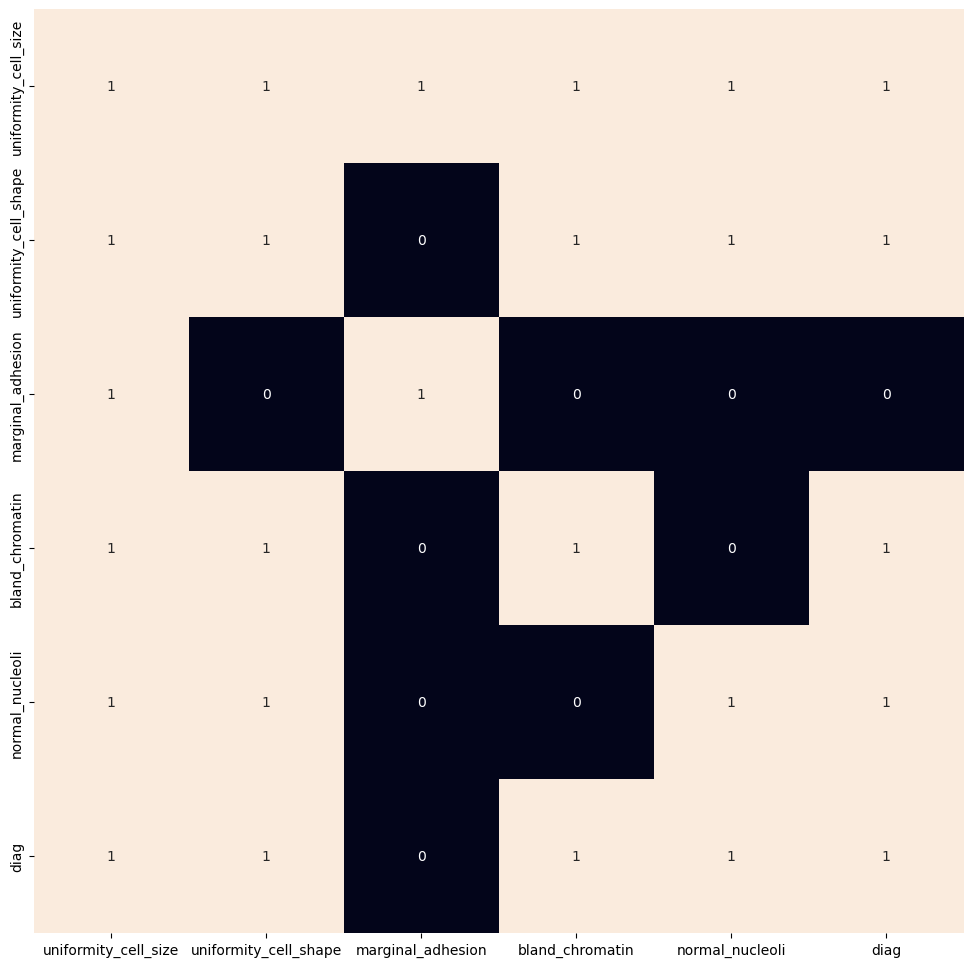

In [9]:
plt.figure(figsize=(12, 12))
sb.heatmap(data.corr() > 0.7, annot=True, cbar=False)
plt.show()

In [14]:


data
x_train = data.iloc[:,:-1]
y_train = data.diag

x_test = data.iloc[:,:-1]
y_test = data.diag
#X = data.iloc[:, 1:5].values
#Y = data.iloc[:, 5].values

In [15]:
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

In [16]:
models = LogisticRegression()


models.fit(x_train, y_train)

print(f'{models} : ')
print('Training Accuracy : ', metrics.roc_auc_score(y_train, models.predict(x_train)))
print('Validation Accuracy : ', metrics.roc_auc_score(
y_test, models.predict(x_test)))
print()


LogisticRegression() : 
Training Accuracy :  0.9360153291416767
Validation Accuracy :  0.9360153291416767



In [18]:
print(metrics.classification_report(y_test,models.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       458
           1       0.94      0.90      0.92       241

    accuracy                           0.95       699
   macro avg       0.95      0.94      0.94       699
weighted avg       0.95      0.95      0.95       699



In [19]:
import pickle
with open('file_cancer.pkl','wb') as file:
    pickle.dump(models,file)

In [20]:
models.predict([[2, 3, 5, 4, 1]])

array([1], dtype=int64)